#### Import packages

In [4]:
#All Imports are run in this block
#Run once every time you restart jupyter kernel
import pm4py
import pandas as pd

#### Read files

In [5]:
#Read itam_ocel.jsonl(json lines) file
#Read itam_ocel_xes file
ocel =pm4py.read_ocel_json('../global/itam_ocel.jsonl')
xes = pm4py.read_xes("itam.xes")

parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

#### Print read data

In [6]:
print(xes)
print(ocel)
#View log data indexes
xes.head()

    ocel:eid            time:timestamp  concept:name  \
0      44378 2024-03-25 08:50:29+00:00      checkout   
1      44379 2024-03-25 08:50:47+00:00      checkout   
2      44382 2024-03-25 08:52:29+00:00      checkout   
3      44384 2024-03-25 08:54:14+00:00      checkout   
4      44385 2024-03-25 08:54:32+00:00      checkout   
..       ...                       ...           ...   
182    44478 2024-03-25 13:33:02+00:00      checkout   
183    44480 2024-03-25 13:35:07+00:00      accepted   
184    44523 2024-03-25 15:30:51+00:00      checkout   
185    44525 2024-03-25 15:32:46+00:00      accepted   
186    44537 2024-03-25 16:47:35+00:00  checkin from   

                                    log_meta           action_date  \
0    {"location_id":{"old":1490,"new":null}}  2024-03-25T08:50:29Z   
1    {"location_id":{"old":1490,"new":null}}  2024-03-25T08:50:47Z   
2    {"location_id":{"old":1490,"new":null}}  2024-03-25T08:52:29Z   
3    {"location_id":{"old":1490,"new":null}}  2

,ocel:eid,time:timestamp,concept:name,log_meta,action_date,action_source,filename,note,case:concept:name,case:ocel:type,...,case:name,case:asset_tag,case:physical,case:last_checkout,case:last_checkin,case:checkin_counter,case:checkout_counter,case:model.name,case:model.manufacturer.name,case:requestable
0,44378,2024-03-25 08:50:29+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:50:29Z,gui,NaN,NaN,A1,admin_user,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,44379,2024-03-25 08:50:47+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:50:47Z,gui,NaN,NaN,A1,admin_user,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,44382,2024-03-25 08:52:29+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:52:29Z,gui,NaN,NaN,A1,admin_user,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,44384,2024-03-25 08:54:14+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:54:14Z,gui,NaN,NaN,A1,admin_user,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,44385,2024-03-25 08:54:32+00:00,checkout,"{""location_id"":{""old"":1490,""new"":null}}",2024-03-25T08:54:32Z,gui,NaN,NaN,A1,admin_user,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Directly Follows Graph

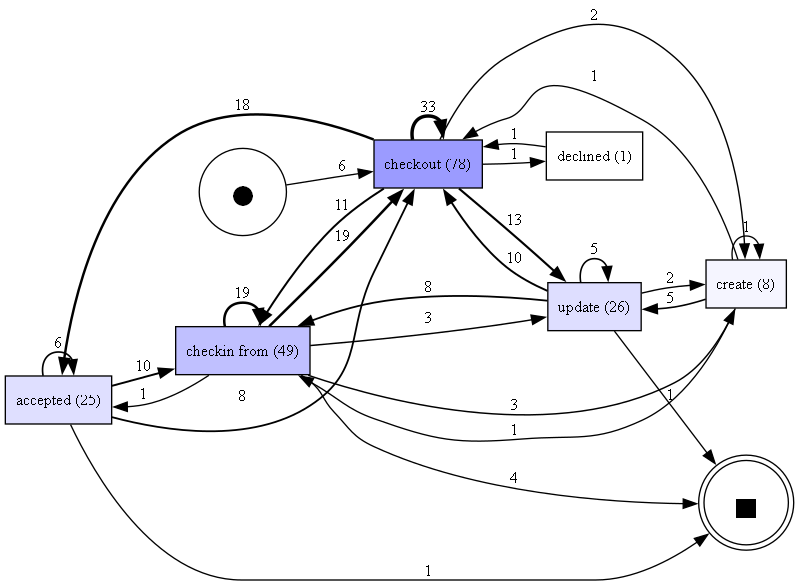

In [7]:
dfg, start_activities, end_activities = pm4py.discover_dfg(xes, 
                                                           case_id_key='case:concept:name',
                                                           activity_key='concept:name',
                                                           timestamp_key='time:timestamp'
                                                           )
pm4py.vis.view_dfg(dfg, start_activities, end_activities)

#### BPMN

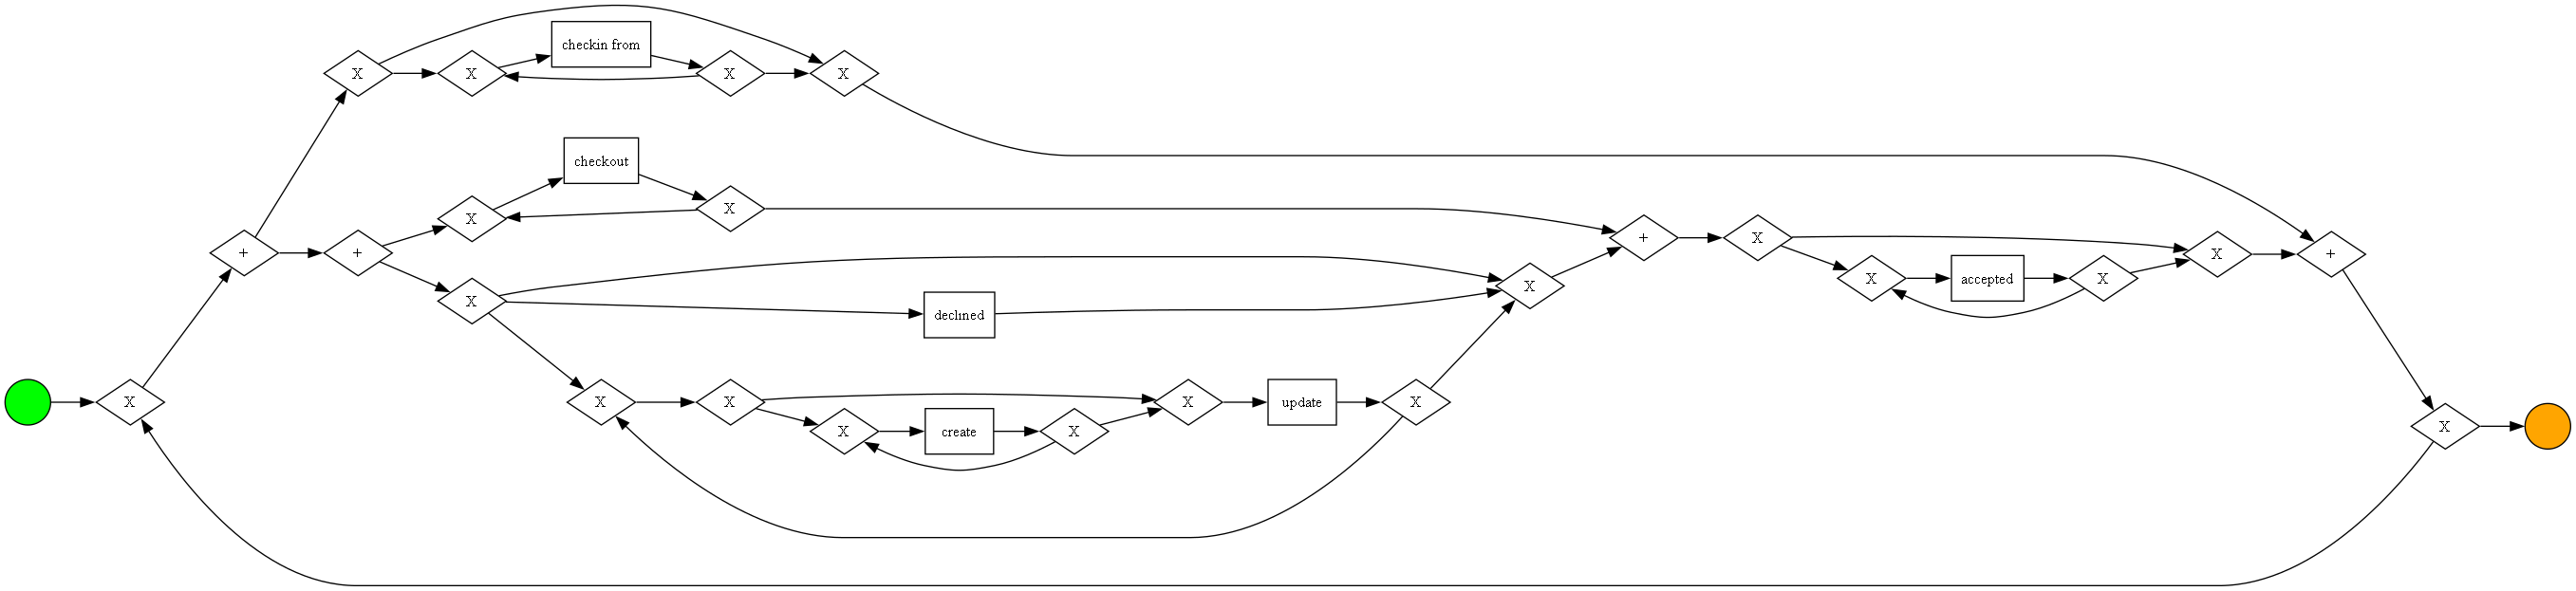

In [8]:
bpmn = pm4py.discover_bpmn_inductive(xes)
pm4py.vis.view_bpmn(bpmn)

#### Heuristics Net

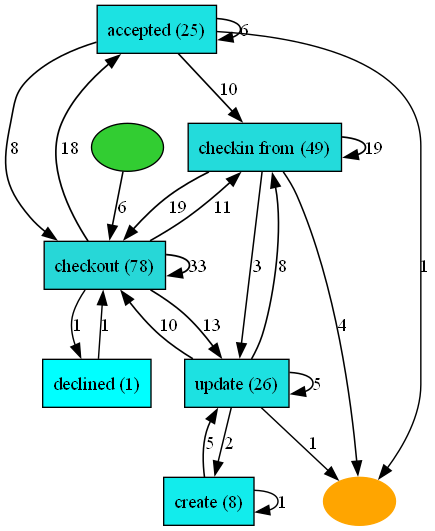

In [9]:
heuristics_net = pm4py.discover_heuristics_net(xes)
pm4py.vis.view_heuristics_net(heuristics_net)

#### Object Centric Directly Follows Graph (OCDFG)

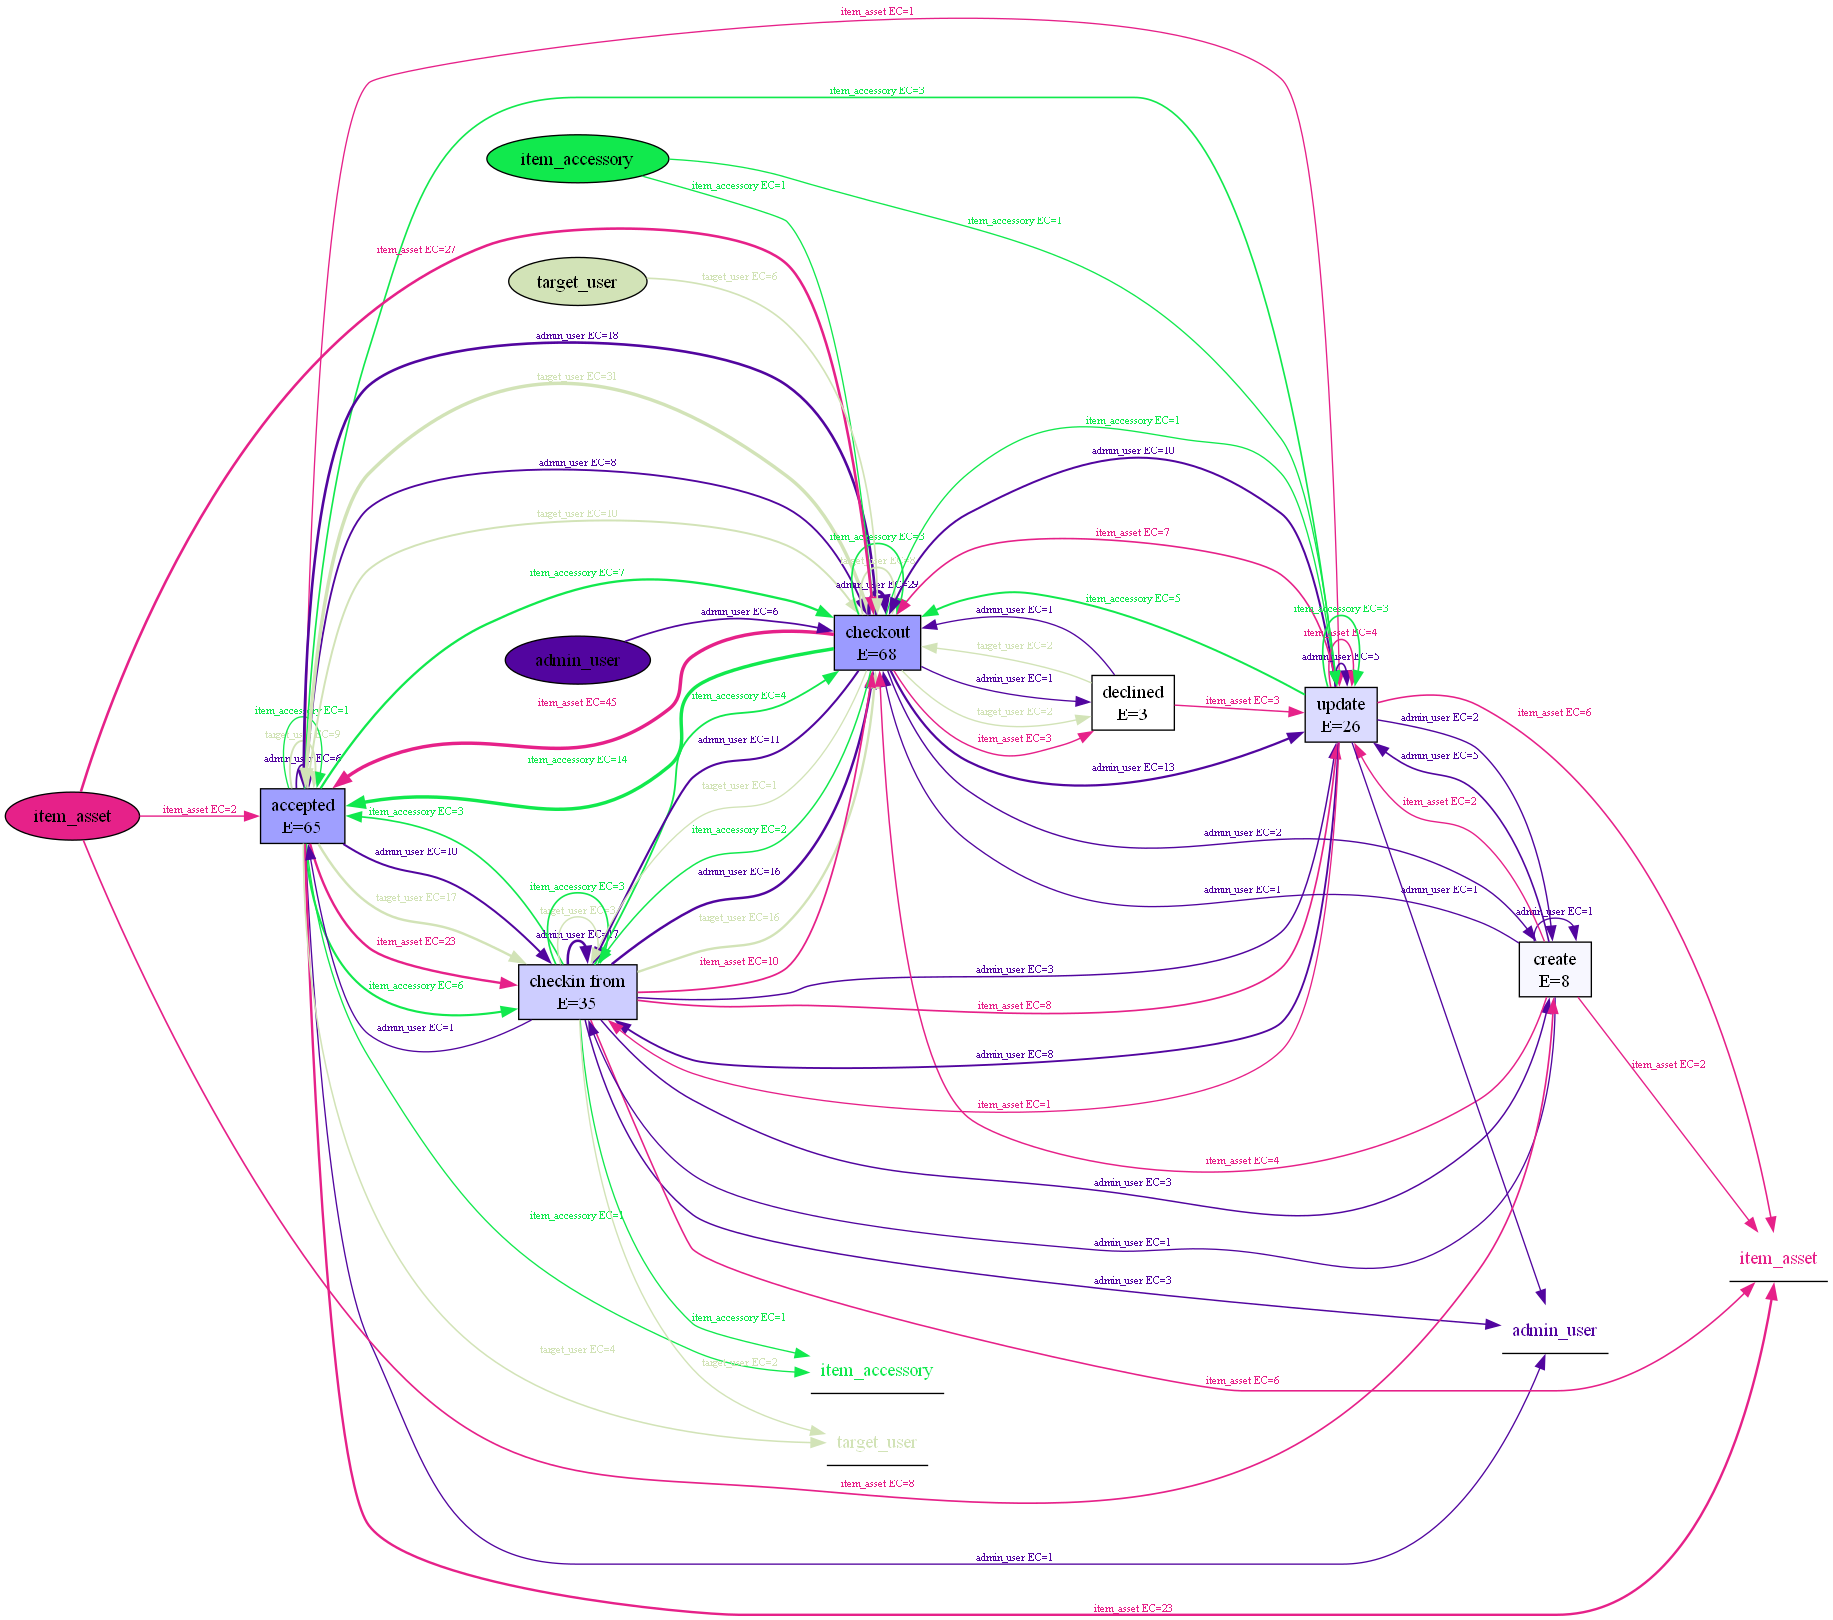

In [10]:
ocel_viz = pm4py.discover_ocdfg(ocel)
pm4py.vis.view_ocdfg(ocel_viz)

#### Process Variations

In [11]:
count = 1
for variant, subdf in pm4py.split_by_process_variant(xes):
    print(f"Variante: {count}")
    print(variant)
    count += 1;

Variante: 1
('checkout', 'checkout', 'checkout', 'checkout', 'checkout', 'create', 'update', 'create', 'update', 'checkin from', 'checkout', 'checkout', 'update', 'checkin from', 'update', 'create', 'checkin from', 'checkin from', 'update', 'update', 'checkin from', 'checkin from', 'checkout', 'checkout', 'update', 'checkout', 'update', 'update', 'checkin from', 'checkout', 'update', 'checkout', 'update', 'update', 'update', 'checkin from', 'checkin from', 'checkout', 'update', 'checkin from', 'checkout', 'update', 'checkout', 'checkout', 'checkout', 'checkout', 'checkin from', 'create', 'update', 'checkout', 'checkout', 'checkin from', 'checkin from', 'checkin from', 'checkin from', 'checkout', 'checkin from', 'checkin from', 'update', 'checkout', 'checkout', 'checkout', 'checkout', 'checkin from', 'checkin from', 'checkin from', 'checkin from', 'checkin from', 'checkout', 'checkout', 'checkout', 'checkin from', 'checkout', 'checkout', 'checkin from', 'checkin from', 'checkin from', '

In [12]:
print(f"Anzahl der Variante: {count - 1}")

Anzahl der Variante: 6
